## 1. Моделирование автокорреляционных функций и функции неопределенности для простых сигналов
### 1.1. Инициализация и формирование значений основных параметров

In [56]:
# Имитационное моделирование и графическая визуализация
# функции неопределенности простых и сложных сигналов

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import rcParams

%matplotlib inline
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 3.88 ms


In [57]:
# функция arrange не включает последнее значение

tstep = 0.05    # Шаг по оси времени
fstep = 0.05;   # Шаг по оси частоты
dT = 2      # Длительность импульса
beta = 1.1 # Коэффициент в переменной времени tmin и tmax
tmin = -beta * dT   # Диапазон значений по времени (мин)
tmax = beta * dT    # Диапазон значений по времени (макс)
fmin = -4/dT       # Диапазон значений по частоте (мин)
fmax = 4/dT        # Диапазон значений по частоте (макс)
t = np.arange(tmin, tmax + tstep, tstep)    # Значения по оси времени
f = np.arange(fmin, fmax + fstep, fstep)    # Значения по оси частоты

time: 1.76 ms


In [58]:
# Настройка параметров шрифта
# и настройка LaTex для вставки в заголовки на графике

fontSize = 12.0   # Размер шрифта графиков
titleFontSize = 16.0    # Размер шрифта заголовка
fontName = "Liberation Serif"    # Название шрифта
rcParams["mathtext.fontset"] = "custom" # Пользовательские параметры графика
rcParams["mathtext.rm"] = fontName  # Обычный стиль
rcParams["mathtext.bf"] = "{}:bold".format(fontName)    # Жирный
rcParams["mathtext.it"] = "{}:italic".format(fontName)  # Курсив

time: 1.47 ms


In [59]:
# Параметры графика

PIC_SIZE = (10, 6)  # Размер графика
PIC_DENSITY = 80    # Плотность пикселей графика
SURFACE_CMAP = cm.plasma    # Цвет поверхностей
tColor = "#0000FF"  # Цвет графиков во временной области (синий)
tColorLight = "#4DB3E6"   # Временная область (голубой)
Color0 = "#FF0000"  # Цвет графиков эталонного сигнала (красный)
fColor = "#FF660"     # Частотная область
eColor = "#D95319"    # Погрешности
eColorLight = "#E6E666"   # Погрешности
eColorDark = "#A2142F"    # Погрешности

time: 2.54 ms


### 1.2 Моделирование двумерной автокорреляционной функции для тонального импульса

In [60]:
# Формирование значений двумерной автокорреляционной
# функции тонального импульса

eps = 0.000001
x = np.empty((t.size, f.size), dtype=float)
for i, el in enumerate(t):
    for j, el2 in enumerate(f):
        val1 = 1.0 - np.abs(el) / dT
        val2 = np.pi * dT * (1.0 - np.abs(el) / dT) * el2
        x[i,j] = np.abs(val1 * np.sin(val2 + eps) / (val2 + eps))

time: 142 ms


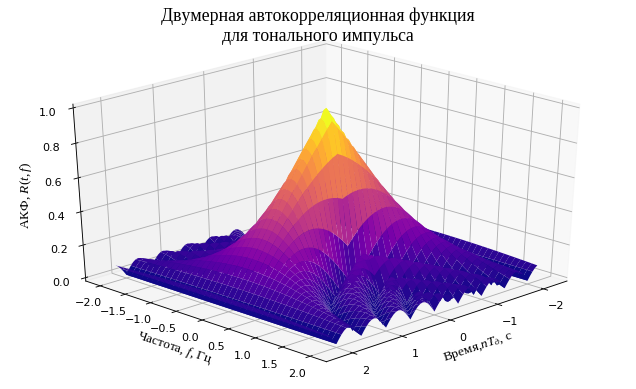

time: 1.98 s


In [61]:
# Формирование трехмерного графика

fig = plt.figure(figsize=PIC_SIZE, dpi=PIC_DENSITY) # Установка параметров графика
ax = fig.gca(projection='3d')   # Получение осей графика
plt.title("Двумерная автокорреляционная функция\nдля тонального импульса", fontname=fontName, fontsize=titleFontSize)   # Заголовок
ax.set_xlabel(r"Время,$\mathit{nT_д}$, с", fontname=fontName, fontsize=fontSize, rotation=90)  # Надпись оси абсцисс
ax.set_ylabel(r"Частота, $\mathit{f}$, Гц", fontname=fontName, fontsize=fontSize)   # Надпись оси ордиант
ax.zaxis.set_rotate_label(False)    # Разрещение ручного вращения надписи по оси Z
ax.set_zlabel(r"АКФ, $\mathit{R(t,f)}$", fontname=fontName, fontsize=fontSize, rotation=90) # Надпись по оси Z
ax.view_init(azim=45)   # Угл вращения графика
f2nd, t2nd = np.meshgrid(f, t)  # создание матрицы координат из f и t

surf = ax.plot_surface(t2nd, f2nd, x, cmap=SURFACE_CMAP)   # Построение трёхмерного графика

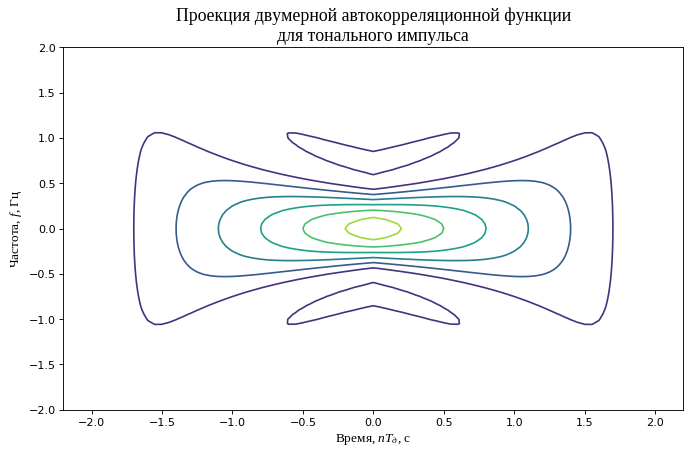

time: 857 ms


In [62]:
# Формирование проеции

fig = plt.figure(figsize=PIC_SIZE, dpi=PIC_DENSITY) # Установка параметров графика
ax = fig.gca() # Установка параметров графика
plt.title("Проекция двумерной автокорреляционной функции\nдля тонального импульса", fontname=fontName, fontsize=titleFontSize)  # Заголовок
ax.set_xlabel(r"Время, $\mathit{nT_д}$, с", fontname=fontName, fontsize=fontSize)  # Надпись оси абсцисс
ax.set_ylabel(r"Частота, $\mathit{f}$, Гц", fontname=fontName, fontsize=fontSize)   # Надпись оси ордиант
cs = ax.contour(t2nd, f2nd, x)  # Построение проекции

### 1.3 Моделирование функции неопределенности для тонального импульса

In [63]:
# Моделирование функции неопределености импульса с линейной частотной модуляцией

y = np.power(x, 2)  # Формирование значений

time: 2.44 ms


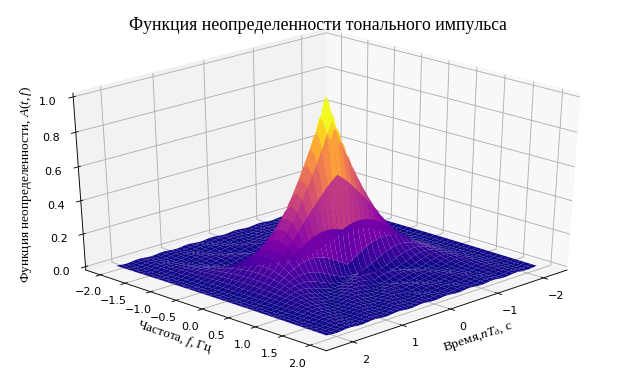

time: 2 s


In [64]:
# Формирование трехмерного графика

fig = plt.figure(figsize=PIC_SIZE, dpi=PIC_DENSITY) # Установка параметров графика
ax = fig.gca(projection='3d')   # Получение осей графика
plt.title("Функция неопределенности тонального импульса", fontname=fontName, fontsize=titleFontSize)    # Заголовок
ax.set_xlabel(r"Время,$\mathit{nT_д}$, с", fontname=fontName, fontsize=fontSize)  # Надпись оси абсцисс
ax.set_ylabel(r"Частота, $\mathit{f}$, Гц", fontname=fontName, fontsize=fontSize)   # Надпись оси ордиант
ax.zaxis.set_rotate_label(False)    # Разрещение ручного вращения надписи по оси Z
ax.set_zlabel(r"Функция неопределенности, $\mathit{A(t,f)}$", fontname=fontName, fontsize=fontSize, rotation=90)    # Надпись по оси Z
ax.view_init(azim=45)   # Угл вращения графика

surf = ax.plot_surface(t2nd, f2nd, y, cmap=SURFACE_CMAP)   # Построение графика

### 1.4 Формирование проекции функции неопределенности для тонального импульса

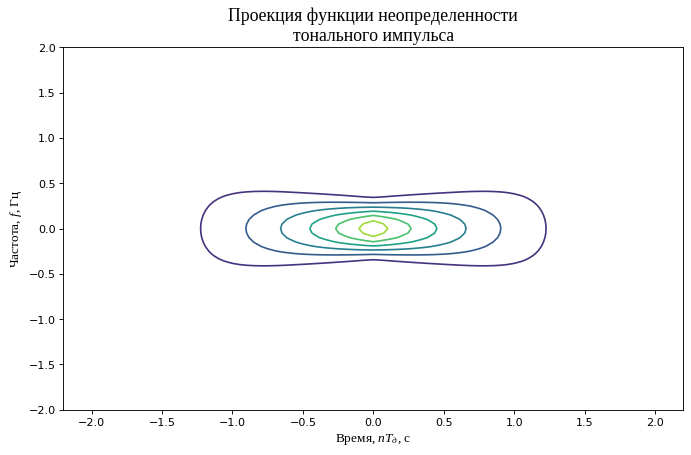

time: 735 ms


In [65]:
# Формирование проеции

fig = plt.figure(figsize=PIC_SIZE, dpi=PIC_DENSITY) # Установка параметров графика
ax = fig.gca()  # Получение осей графика
plt.title("Проекция функции неопределенности\nтонального импульса", fontname=fontName, fontsize=titleFontSize)  # Заголовок
ax.set_xlabel(r"Время, $\mathit{nT_д}$, с", fontname=fontName, fontsize=fontSize)  # Надпись оси абсцисс
ax.set_ylabel(r"Частота, $\mathit{f}$, Гц", fontname=fontName, fontsize=fontSize)   # Надпись оси ордиант
cs = ax.contour(t2nd, f2nd, y)  # Построение графика

### 1.5 Моделирование автокорреляционной функции по времени для тонального импульса

In [66]:
# Формирование автокорреляционной функции по частоте для тонального
# импульса

xf = x[:,np.rint((fmax - fmin) / (2 * fstep)).astype(int)]

time: 1.61 ms


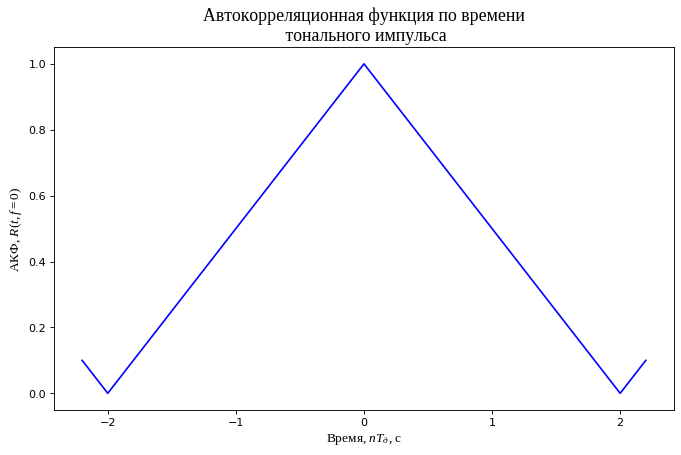

time: 625 ms


In [67]:
# Формирование графика

fig = plt.figure(figsize=PIC_SIZE, dpi=PIC_DENSITY) # Установка параметров графика
plt.title("Автокорреляционная функция по времени\n \
тонального импульса", fontname=fontName, fontsize=titleFontSize)    # Заголовок
plt.xlabel(r"Время, $\mathit{nT_д}$, c", fontname=fontName, fontsize=fontSize)  # Надпись оси абсцисс
plt.ylabel(r"АКФ, $\mathit{R(t,f=0)}$", fontname=fontName, fontsize=fontSize)   # Надпись оси ордиант
plt.plot(t, xf, color=tColor)   # Построение графика

plt.show()  # Отрисовка графика

### 1.6 Моделирование автокорреляционной функции по частоте для тонального импульса

In [68]:
# Формирование автокорреляционной функции по времени для тонального
# импульса

xt = x[np.rint((tmax - tmin) / (2 * tstep)).astype(int),] # Формирование значений

time: 1.03 ms


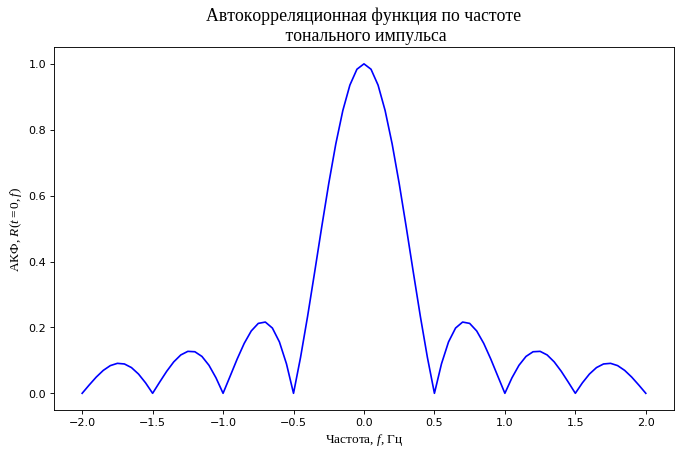

time: 916 ms


In [69]:
# Формирование графика

fig = plt.figure(figsize=PIC_SIZE, dpi=PIC_DENSITY) # Установка параметров графика
plt.title("Автокорреляционная функция по частоте\n \
тонального импульса", fontname=fontName, fontsize=titleFontSize)    # Заголовок
plt.xlabel(r"Частота, $\mathit{f}$, Гц", fontname=fontName, fontsize=fontSize)  # Надпись оси абсцисс
plt.ylabel(r"АКФ, $\mathit{R(t=0,f)}$", fontname=fontName, fontsize=fontSize)   # Надпись оси ордиант
plt.plot(f, xt, color=tColor)   # Построение графика

plt.show()  # Отрисовка графика

## 2 Моделирование автокорреляционных функций и функции неопределенности для сложных сигналов
### 2.1 Инициализация и формирование значений основных параметров

In [70]:
# Формирование двумерной автокорреляционной функции ЛЧМ-импульса
fDelta = 2  # Ширина спектра импульса
mu = (fDelta * fmax) / (2 * dT) # Линейный коэффициент девиации частоты

time: 876 µs


### 2.2 Моделирование двумерной автокорреляционной функции для импульса с линейной частотной модуляцией

In [71]:
for i, el in enumerate(t):
    for j, el2 in enumerate(f):
        val1 = 1.0 - np.abs(el) / dT
        val2 = np.pi * dT * (1.0 - np.abs(el) / dT)
        val3 = (el2 + mu * el)
        val = val2 * val3
        x[i,j] = np.power(np.abs(val1 * (np.sin(val + eps) / (val + eps))), 2)

time: 163 ms


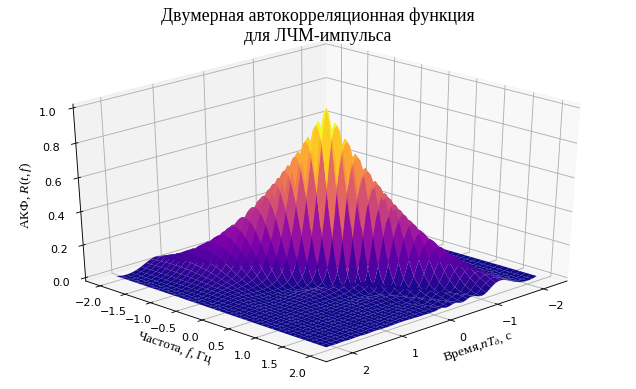

time: 1.85 s


In [72]:
# Формирование трехмерного графика

fig = plt.figure(figsize=PIC_SIZE, dpi=PIC_DENSITY) # Установка параметров графика
ax = fig.gca(projection='3d')   # Получение осей графика
plt.title("Двумерная автокорреляционная функция\nдля ЛЧМ-импульса", fontname=fontName, fontsize=titleFontSize)  # Заголовок
ax.set_xlabel(r"Время,$\mathit{nT_д}$, с", fontname=fontName, fontsize=fontSize, rotation=90)  # Надпись оси абсцисс
ax.set_ylabel(r"Частота, $\mathit{f}$, Гц", fontname=fontName, fontsize=fontSize)   # Надпись оси ордиант
ax.zaxis.set_rotate_label(False)    # Разрещение ручного вращения надписи по оси Z
ax.set_zlabel(r"АКФ, $\mathit{R(t,f)}$", fontname=fontName, fontsize=fontSize, rotation=90) # Надпись по оси Z
ax.view_init(azim=45)   # Угл вращения графика

surf = ax.plot_surface(t2nd, f2nd, x, cmap=SURFACE_CMAP)   # Построение графика

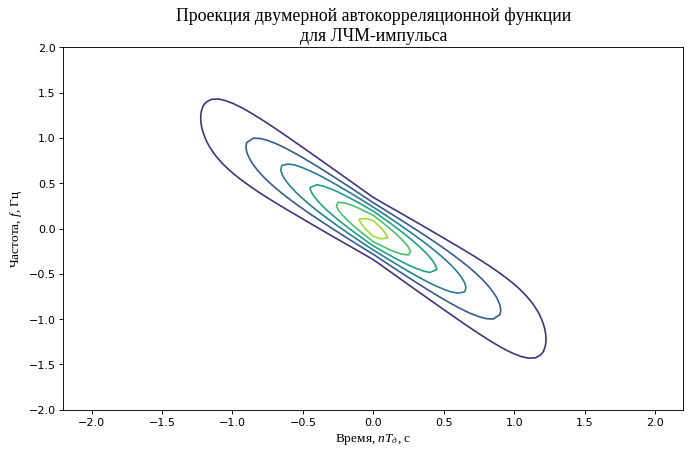

time: 741 ms


In [73]:
# Формирование проеции

fig = plt.figure(figsize=PIC_SIZE, dpi=PIC_DENSITY) # Установка параметров графика
ax = fig.gca()  # Получение осей графика
plt.title("Проекция двумерной автокорреляционной функции\nдля ЛЧМ-импульса", fontname=fontName, fontsize=titleFontSize) # Заголовок
ax.set_xlabel(r"Время, $\mathit{nT_д}$, с", fontname=fontName, fontsize=fontSize)  # Надпись оси абсцисс
ax.set_ylabel(r"Частота, $\mathit{f}$, Гц", fontname=fontName, fontsize=fontSize)   # Надпись оси ордиант
cs = ax.contour(t2nd, f2nd, x)  # Построение графика

### 2.3 Моделирование функции неопределенности для импульса с линейной частотной модуляцией

In [74]:
# Моделирование функции неопределености импульса с линейной частотной модуляцией

y = np.power(x, 2)  # Формирование значений

time: 1.26 ms


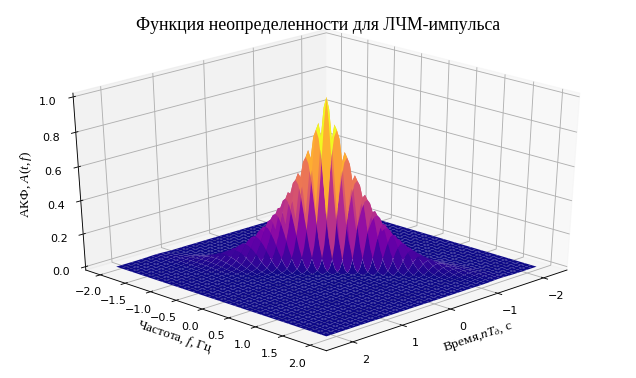

time: 2.13 s


In [75]:
# Формирование трехмерного графика

fig = plt.figure(figsize=PIC_SIZE, dpi=PIC_DENSITY) # Установка параметров графика
ax = fig.gca(projection='3d')   # Получение осей графика
plt.title("Функция неопределенности для ЛЧМ-импульса", fontname=fontName, fontsize=titleFontSize)   # Заголовок
ax.set_xlabel(r"Время,$\mathit{nT_д}$, с", fontname=fontName, fontsize=fontSize)  # Надпись оси абсцисс
ax.set_ylabel(r"Частота, $\mathit{f}$, Гц", fontname=fontName, fontsize=fontSize)   # Надпись оси ордиант
ax.zaxis.set_rotate_label(False)    # Разрещение ручного вращения надписи по оси Z
ax.set_zlabel(r"АКФ, $\mathit{A(t,f)}$", fontname=fontName, fontsize=fontSize, rotation=90) # Надпись по оси Z
ax.view_init(azim=45)   # Угл вращения графика

surf = ax.plot_surface(t2nd, f2nd, y, cmap=SURFACE_CMAP)      # Построение графика

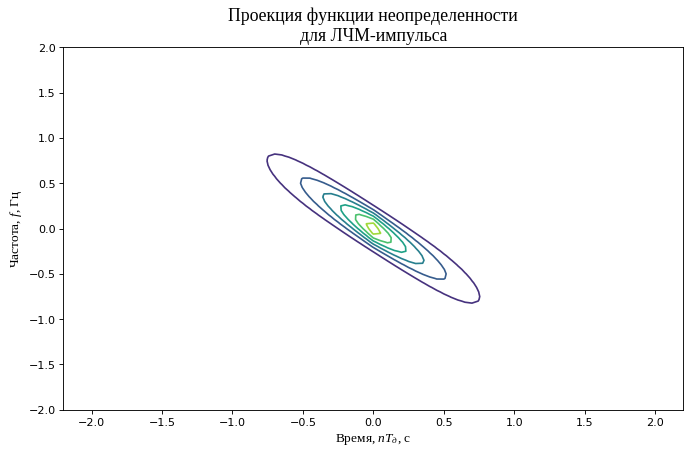

time: 643 ms


In [76]:
# Формирование проеции

fig = plt.figure(figsize=PIC_SIZE, dpi=PIC_DENSITY) # Установка параметров графика
ax = fig.gca()  # Получение осей графика
plt.title("Проекция функции неопределенности\nдля ЛЧМ-импульса", fontname=fontName, fontsize=titleFontSize) # Заголовок
ax.set_xlabel(r"Время, $\mathit{nT_д}$, с", fontname=fontName, fontsize=fontSize)  # Надпись оси абсцисс
ax.set_ylabel(r"Частота, $\mathit{f}$, Гц", fontname=fontName, fontsize=fontSize)   # Надпись оси ордиант
cs = ax.contour(t2nd, f2nd, y)    # Отрисовка графика

### 2.4 Моделирование автокорреляционной функции по времени для импульса с линейной частотной модуляцией

In [77]:
# Формирование автокорреляционной функции по времени для тонального
# импульса

xt = x[:,np.rint((fmax - fmin) / (2 * fstep)).astype(int)] # Формирование значений

time: 1.03 ms


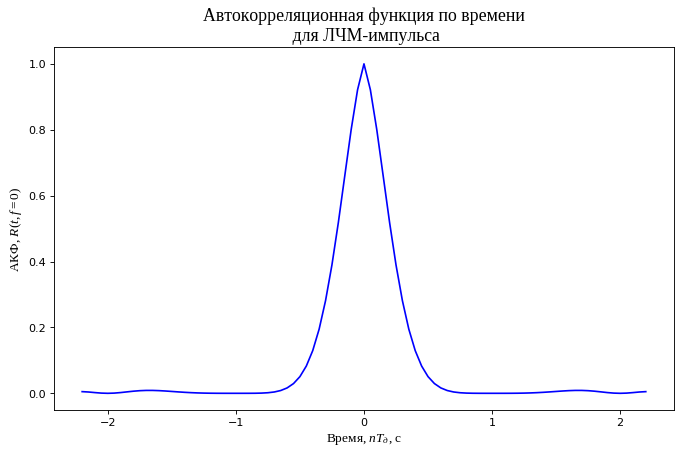

time: 589 ms


In [78]:
# Формирование графика

fig = plt.figure(figsize=PIC_SIZE, dpi=PIC_DENSITY) # Установка параметров графика
plt.title("Автокорреляционная функция по времени\n \
для ЛЧМ-импульса", fontname=fontName, fontsize=titleFontSize)   # Заголовок
plt.xlabel(r"Время, $\mathit{nT_д}$, с", fontname=fontName, fontsize=fontSize)  # Надпись оси абсцисс
plt.ylabel(r"АКФ, $\mathit{R(t,f=0)}$", fontname=fontName, fontsize=fontSize)   # Надпись оси ордиант
plt.plot(t, xt, color=tColor)   # Построение графика

plt.show()  # Отрисовка графика

### 2.5 Моделирование автокорреляционной функции по времени для импульса с линейной частотной модуляцией

In [79]:
# Формирование автокорреляционной функции по частоте для ЛЧМ-импульса

xf = x[np.rint((tmax - tmin) / (2 * tstep)).astype(int),]   # Формирование значений

time: 1.1 ms


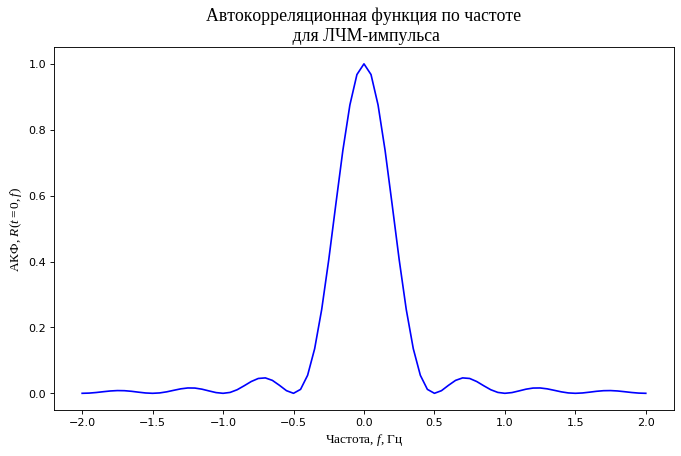

time: 633 ms


In [80]:
# Формирование графика

fig = plt.figure(figsize=PIC_SIZE, dpi=PIC_DENSITY) # Установка параметров графика
plt.title("Автокорреляционная функция по частоте\n \
для ЛЧМ-импульса", fontname=fontName, fontsize=titleFontSize)   # Заголовок
plt.xlabel(r"Частота, $\mathit{f}$, Гц", fontname=fontName, fontsize=fontSize)  # Надпись оси абсцисс
plt.ylabel(r"АКФ, $\mathit{R(t=0,f)}$", fontname=fontName, fontsize=fontSize)   # Надпись оси ордиант
plt.plot(f, xf, color=tColor)   # Построение графика

plt.show()  # Отрисовка графика